In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station
#adds classes to the base. These were the keys that were imported?

In [7]:
session = Session(engine)

In [8]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [9]:
results = []

In [10]:
results = session.query(Measurement.date, Measurement.prcp)

In [11]:
#print(results.all())

In [12]:
precip_df = pd.DataFrame(results, columns=['date','precipitation'])

In [13]:
precip_df.head()

,date,precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [14]:
precip_df.set_index(precip_df['date'], inplace=True)

In [15]:
print(precip_df)

                  date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-02  2010-01-02           0.00
2010-01-03  2010-01-03           0.00
2010-01-04  2010-01-04           0.00
2010-01-06  2010-01-06            NaN
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]


In [16]:
#print(df.to_string(index=False))

In [17]:
precip_df = precip_df.sort_index()

In [18]:
#print(df.to_string(index=False))

<AxesSubplot:xlabel='date'>

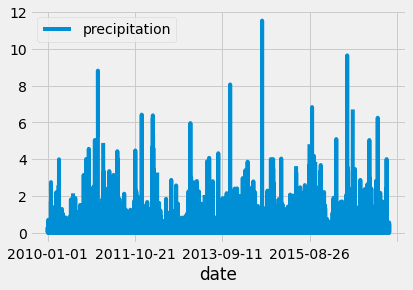

In [19]:
precip_df.plot()
#doesn't have the age like the example has

In [32]:
precip_df['year'] = pd.DatetimeIndex(precip_df['date']).year
precip_df['month'] = pd.DatetimeIndex(precip_df['date']).month

In [33]:
precip_df.head()

,date,precipitation,year,month
date,,,,
2010-01-01,2010-01-01,0.08,2010,1
2010-01-01,2010-01-01,0.21,2010,1
2010-01-01,2010-01-01,0.15,2010,1
2010-01-01,2010-01-01,0.15,2010,1
2010-01-01,2010-01-01,0.05,2010,1


In [48]:
mean_precip_df = precip_df.groupby('month').agg(average_monthly_precipitation = ('precipitation', 'mean'))
#print(['month'])

<AxesSubplot:title={'center':'Hawaii Rainfall'}, xlabel='month'>

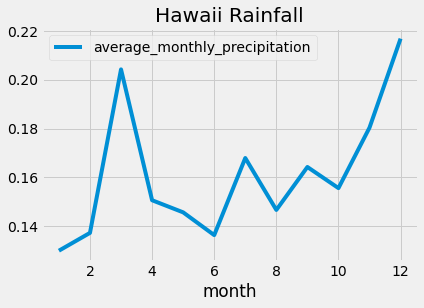

In [50]:
mean_precip_df.plot(title = 'Hawaii Rainfall', kind = 'line')


In [ ]:
precip_df.plot

In [43]:
precip_df.groupby('month').agg({'precipitation': ['mean', 'min', 'max', 'sum']})

#print(precip_df)

precipitation                    
               mean  min    max     sum
month                                  
1          0.129975  0.0   8.81  210.56
2          0.137271  0.0   5.04  201.24
3          0.204227  0.0   6.38  319.82
4          0.150639  0.0   6.25  240.27
5          0.145677  0.0   4.07  236.58
6          0.136360  0.0   4.43  214.63
7          0.167922  0.0  11.53  263.47
8          0.146662  0.0   4.81  218.82
9          0.164249  0.0   6.83  226.50
10         0.155606  0.0   4.47  224.85
11         0.180380  0.0   8.06  246.76
12         0.216819  0.0   6.42  304.63

In [20]:
precip_df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [21]:
from sqlalchemy import extract
june_precip = session.query(Measurement.date,Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).all()

In [22]:
june_precip

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [23]:
jp_df = pd.DataFrame(june_precip, columns=['date','June Precipitation'])
jp_df.sort_index()
jp_df

,date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [24]:
dec_precip = session.query(Measurement.date,Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).all()

In [25]:
dp_df = pd.DataFrame(june_precip, columns=['date','December Precip.'])
dp_df.sort_index()
dp_df

,date,December Precip.
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [26]:
#Begin a new query to find the number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [27]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
#why is Measurement.station listen BEFORE the function count?

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [30]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 0.2123520923520915)]

In [ ]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [ ]:
print(results)

In [ ]:
best_station_df = pd.DataFrame(results, columns=['tobs'])

In [ ]:
print(best_station_df)

In [ ]:
best_station_df.plot.hist(bins=12)

In [ ]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge